In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from pathlib import Path

# Chargement de l'index
df = pd.read_csv('../data/metadata.csv')
df.head()

,path,filename,label,is_labeled
0,/Users/xaviercoulon/Documents/OC/OC_P10_SSL/da...,3f4cb3e9-75fc-4b40-942c-327f2498b37d.jpg,0,True
1,/Users/xaviercoulon/Documents/OC/OC_P10_SSL/da...,4a08dc59-4f77-4ae0-80b4-749dbde82b82.jpg,0,True
2,/Users/xaviercoulon/Documents/OC/OC_P10_SSL/da...,cb46329d-12f5-451d-94c6-cb094c101742.jpg,0,True
3,/Users/xaviercoulon/Documents/OC/OC_P10_SSL/da...,64b1b1ba-52e5-449d-9537-d2a1e07c0b10.jpg,0,True
4,/Users/xaviercoulon/Documents/OC/OC_P10_SSL/da...,0161f9bf-fa93-4d02-8dce-84bfd49fe6a2.jpg,0,True


Répartition des données :
label
Sans Label    1406
Normal          50
Cancer          50
Name: count, dtype: int64


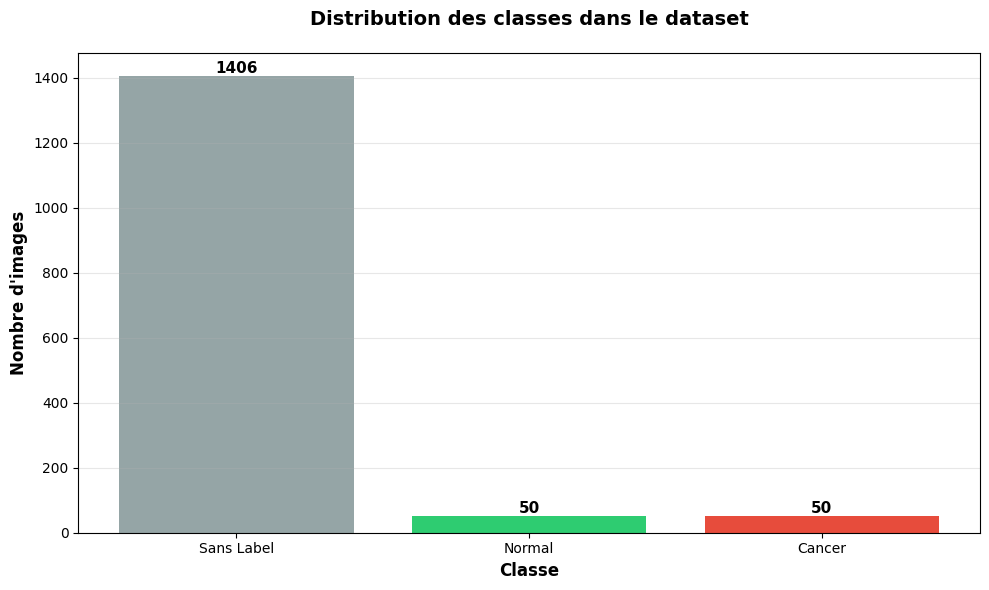

In [2]:
# Distribution des classes
counts = df["label"].value_counts().sort_index()
print("Répartition des données :")
print(counts.rename({0: "Normal", 1: "Cancer", -1: "Sans Label"}))

# Visualisation améliorée
fig, ax = plt.subplots(figsize=(10, 6))
colors = ["#95a5a6", "#2ecc71", "#e74c3c"]
# Utiliser reindex pour éviter les KeyError si un label manque
counts_full = counts.reindex([-1, 0, 1], fill_value=0)
bars = ax.bar(["Sans Label", "Normal", "Cancer"], counts_full, color=colors)

# Ajouter les valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}', ha='center', va='bottom', 
            fontsize=11, fontweight='bold')

# Personnaliser
ax.set_xlabel("Classe", fontsize=12, fontweight='bold')
ax.set_ylabel("Nombre d'images", fontsize=12, fontweight='bold')
ax.set_title("Distribution des classes dans le dataset", fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [3]:
import sys
sys.path.append('..')

from src.data_utils import get_img_info

# Extraction des dimensions et modes (peut prendre quelques secondes)
try:
    df[["size", "mode"]] = df["path"].apply(lambda x: pd.Series(get_img_info(x)))
except Exception as e:
    print(f"⚠️  Erreur lors de l'extraction des infos images : {e}")

print("Résolutions trouvées :", df["size"].unique())
print("Modes colorimétriques :", df["mode"].unique())

Résolutions trouvées : [(512, 512)]
Modes colorimétriques : <StringArray>
['RGB']
Length: 1, dtype: str


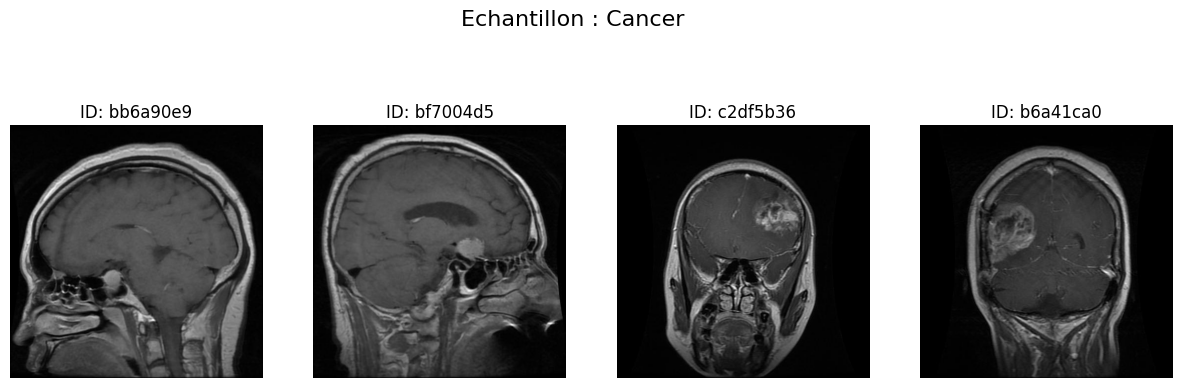

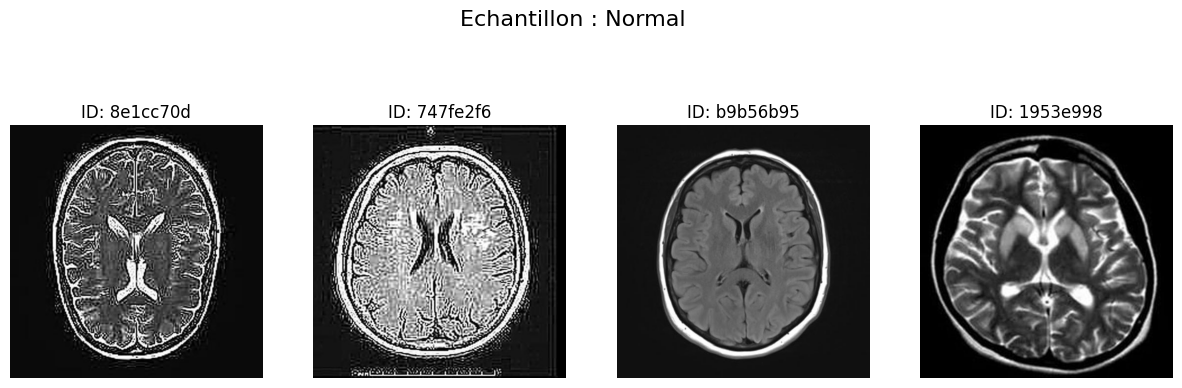

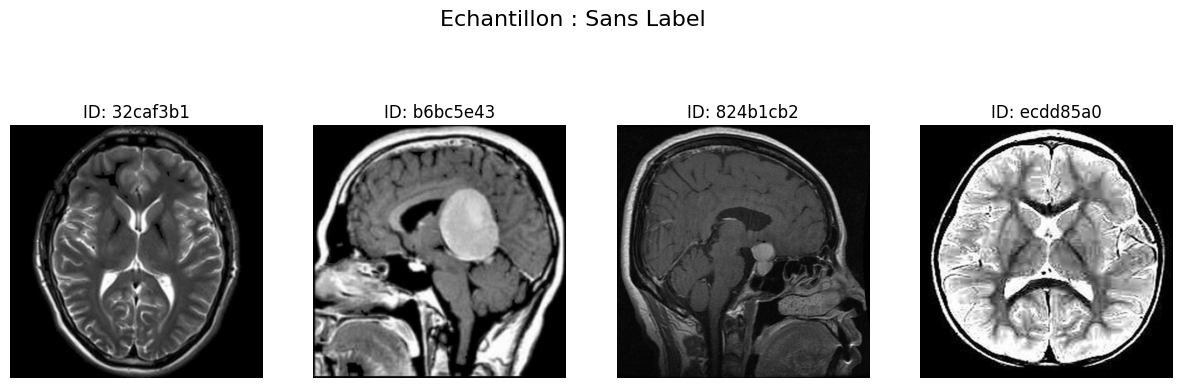

In [4]:
from src.viz_utils import plot_grid

plot_grid(df, 1, "Echantillon : Cancer")
plot_grid(df, 0, "Echantillon : Normal")
plot_grid(df, -1, "Echantillon : Sans Label")

Taille du dataset : 1506 images


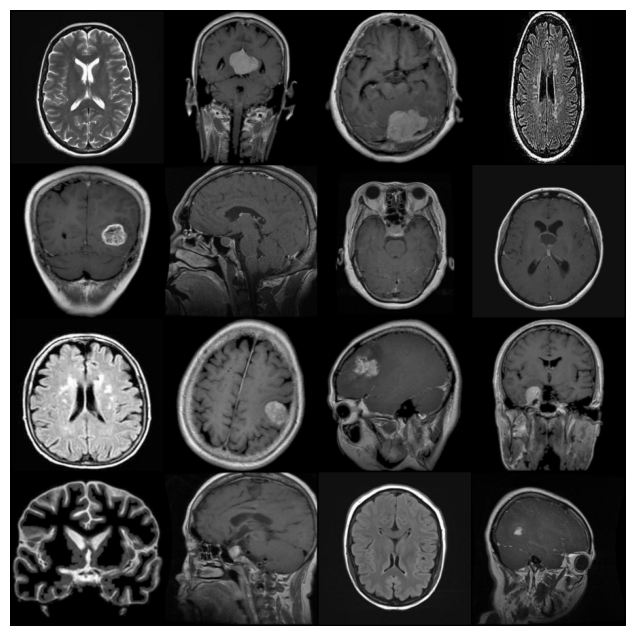

Moyenne (RGB) : tensor([0.2055, 0.2055, 0.2055])
Écart-type (RGB) : tensor([0.1885, 0.1885, 0.1885])


In [5]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Setup des chemins
from src.data_utils import BrainScanDataset
from src.viz_utils import show_batch_grid
from src.stats_utils import compute_dataset_stats

# 1. Initialisation (On transforme juste en Tensor pour l'EDA)
base_transform = transforms.Compose(
    [transforms.Resize((224, 224)), transforms.ToTensor()]
)

dataset = BrainScanDataset("../data/metadata.csv", transform=base_transform)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# 2. Exécution des tâches A, B et C
print(f"Taille du dataset : {len(dataset)} images")

# Tâche B : Visualisation de la grille
show_batch_grid(loader)

# Tâche C : Calcul des stats (Moyenne & STD)
mean, std = compute_dataset_stats(loader)
print(f"Moyenne (RGB) : {mean}")
print(f"Écart-type (RGB) : {std}")